# Problem Statement

Performing Exploratory Data Analysis on the dataset which consists of 3 months worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

We Start by doing some basic checks 
-  are there any data issues? 
- Does the data need to be cleaned?
- Gather some interesting overall insights about the data on what is the average transaction amount? 
- How many transactions do customers make each month, on average?
- Segmenting the dataset by transaction date and time. 
- Visualising transaction volume and spending over the course of an average day or week. 
- Consider the effect of any outliers that may distort our analysis.
– what insights can you draw from the location information provided in the dataset?

# Loading the dataset

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
data.shape

(12043, 23)

# Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
# checking for missing values in the main data
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

**Data Cleaning**

In [6]:
# Checking missing values we have in %

n_rows_data = data.shape[0]
print(data.isnull().sum()*100/n_rows_data)

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64


We have printed the percentage of the missing values for every column in our main dataset. We can directly drop the columns that have more than 50% of their values missing.

In [7]:
# Drop the columns with 50% or more missing values
data.drop(['bpay_biller_code', 'merchant_code'], axis=1, inplace=True)

data.isnull().sum()

status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [8]:
# unique values in each column
data.nunique()

status                   2
card_present_flag        2
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

We can see that there are columns which are not of any use such as country, currency these all have only one value so we can drop them.

In [9]:
data.drop(['currency', 'country'], axis=1, inplace=True)

In [10]:
data.shape

(12043, 19)

In [11]:
# analyzing the date column
data.date

0       2018-08-01
1       2018-08-01
2       2018-08-01
3       2018-08-01
4       2018-08-01
           ...    
12038   2018-10-31
12039   2018-10-31
12040   2018-10-31
12041   2018-10-31
12042   2018-10-31
Name: date, Length: 12043, dtype: datetime64[ns]

In [12]:
import datetime as dt
data['weekday'] = data['date'].dt.day_name()

In [13]:
data.weekday.value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: weekday, dtype: int64

In [14]:
data['month_name'] = data['date'].dt.month_name()
data.month_name.value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

**Average Transaction for each month**

In [15]:
aug = data[data["month_name"] == 'August']
print("Average transaction for August is :", aug.loc[:, 'amount'].mean())

Average transaction for August is : 185.12186659903654


In [16]:
sep = data[data['month_name'] == "September"]
print("Average transaction of month September is :", sep.loc[:, 'amount'].mean())

Average transaction of month September is : 182.04590331422853


In [17]:
oct = data[data['month_name'] == 'October']
print("Average transaction of month October is :", oct.loc[:, 'amount'].mean())

Average transaction of month October is : 196.42732321996542


**Maximum and Minimum Transaction for each month**

In [18]:
print("Maximum Trancation in August Month is :", aug.loc[:, 'amount'].max())
print("Minimum Trancation in August Month is :", aug.loc[:, 'amount'].min())

Maximum Trancation in August Month is : 8835.98
Minimum Trancation in August Month is : 1.52


In [19]:
print("Maximum Trancation in September Month is :", sep.loc[:, 'amount'].max())
print("Minimum Trancation in September Month is :", sep.loc[:, 'amount'].min())

Maximum Trancation in September Month is : 8835.98
Minimum Trancation in September Month is : 0.1


In [20]:
print("Maximum Trancation in October Month is :", oct.loc[:, 'amount'].max())
print("Minimum Trancation in October Month is :", oct.loc[:, 'amount'].min())

Maximum Trancation in October Month is : 8835.98
Minimum Trancation in October Month is : 0.1


# Data Visualization

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


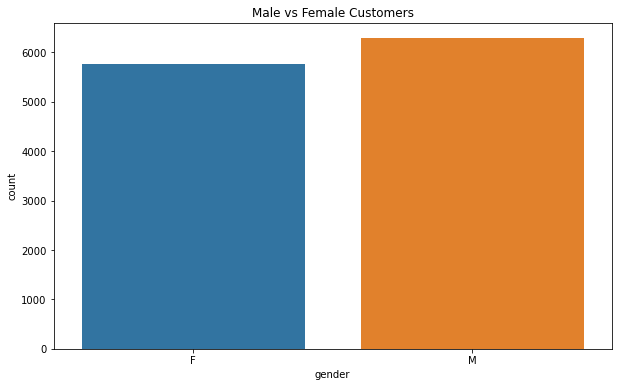

In [21]:
# Number of Male & female customers
plt.figure(figsize=(10, 6))
sb.countplot(data.gender).set(title = "Male vs Female Customers")
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


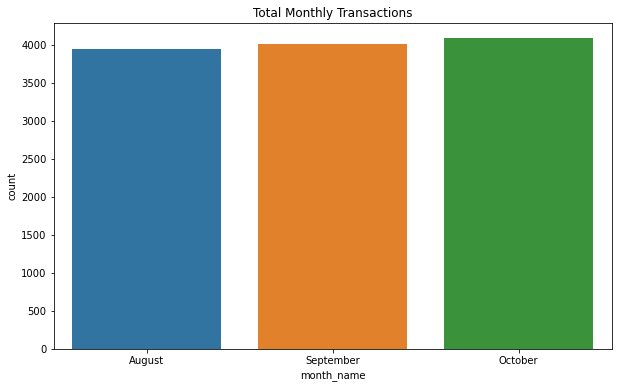

In [22]:
# Transactions by month
plt.figure(figsize=(10, 6))
sb.countplot(data.month_name).set(title = "Total Monthly Transactions")
plt.show()

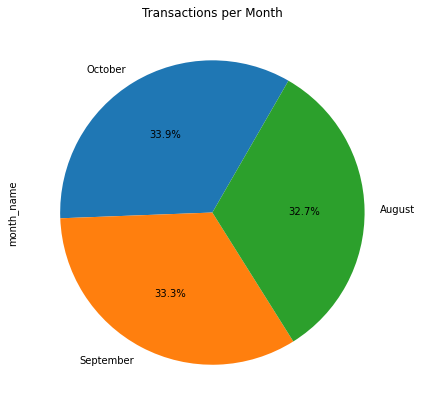

In [23]:
# Transactions by month with percentage
plt.figure(figsize=(7, 7))
data['month_name'].value_counts().plot.pie(autopct='%1.1f%%',startangle=60)
plt.title('Transactions per Month')
plt.show()

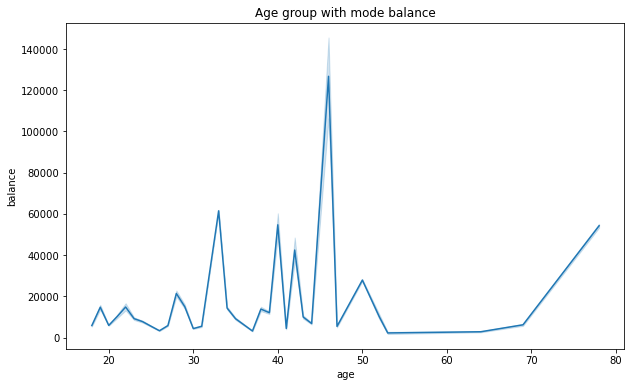

In [24]:
# Age Vs balance
plt.figure(figsize=(10, 6))
sb.lineplot(x ='age', y='balance', data=data).set(title = "Age group with mode balance")
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


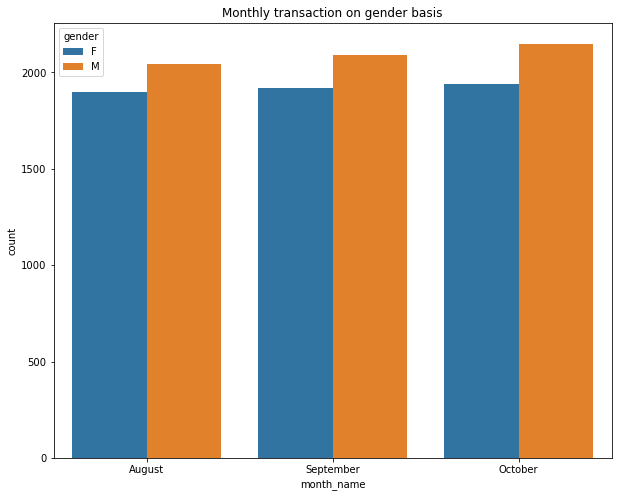

In [25]:
# Monthly transaction by gender
plt.figure(figsize=(10, 8))
sb.countplot(data.month_name, hue=data.gender).set(title = 'Monthly transaction on gender basis')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


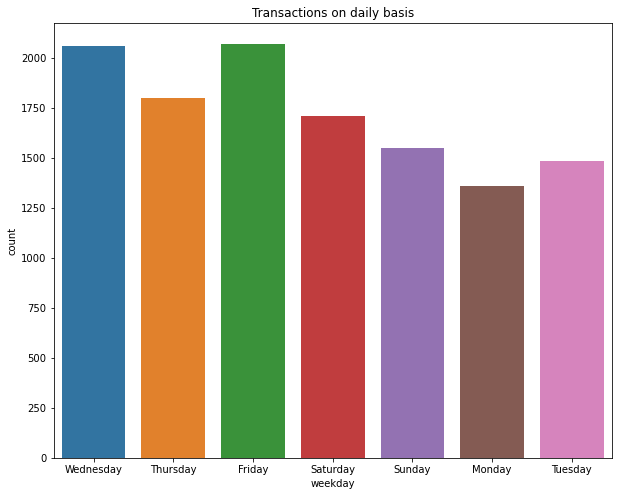

In [26]:
# Monthly transaction by weekdays
plt.figure(figsize=(10, 8))
sb.countplot(data.weekday).set(title ="Transactions on daily basis")
plt.show()

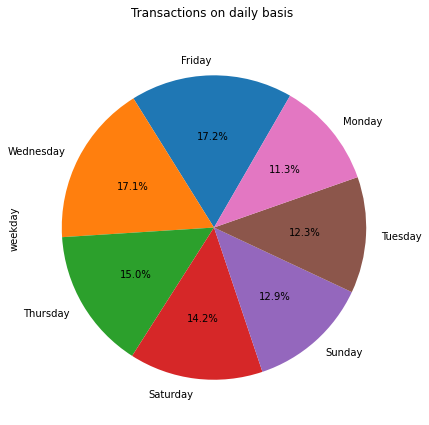

In [27]:
# Monthly transaction by weekdays with percentages
plt.figure(figsize=(7, 7))
data.weekday.value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title("Transactions on daily basis \n")
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


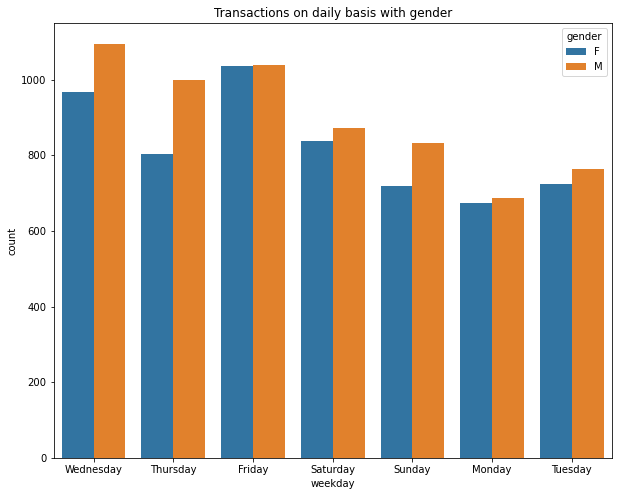

In [28]:
# Monthly transaction by weekdays with Gender
plt.figure(figsize=(10, 8))
sb.countplot(data.weekday, hue=data.gender).set(title='Transactions on daily basis with gender')
plt.show()

In [29]:
# With card payments
data['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


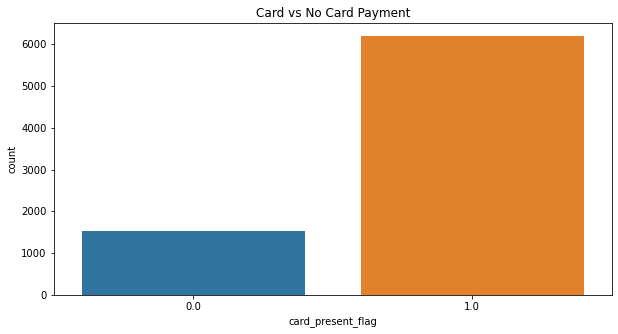

In [30]:
plt.figure(figsize=(10, 5))
sb.countplot(data['card_present_flag']).set(title = 'Card vs No Card Payment')
plt.show()

In [31]:
# Transaction Status
data['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

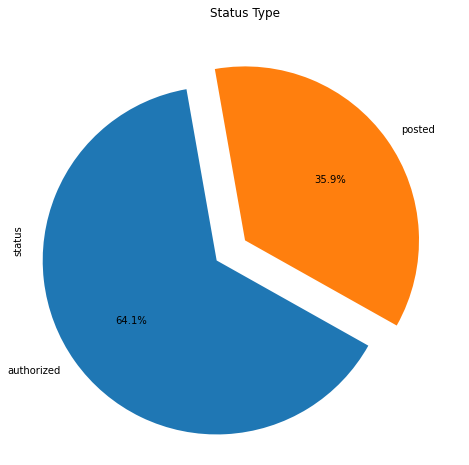

In [32]:
plt.figure(figsize=(8,8))
explode=(0.2,0)
data['status'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', startangle=100)
plt.title('Status Type')
plt.show()

In [33]:
# Movement type(Credit or Debit)
data.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

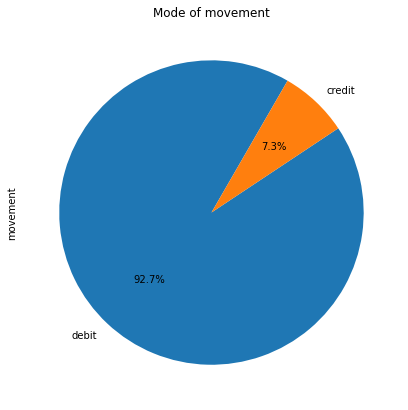

In [34]:
plt.figure(figsize=(7, 7))
data['movement'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Mode of movement')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


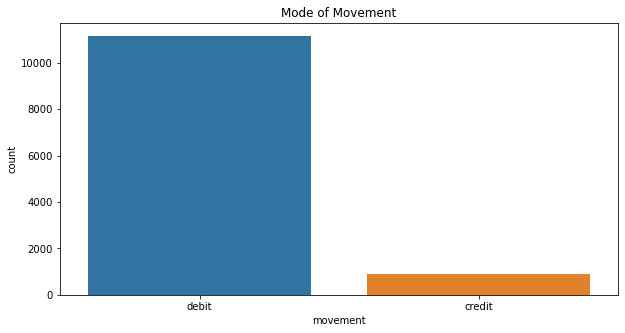

In [35]:
plt.figure(figsize=(10, 5))
sb.countplot(data.movement).set(title = "Mode of Movement")
plt.show()

In [36]:
# State Wise Transaction Count
data.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


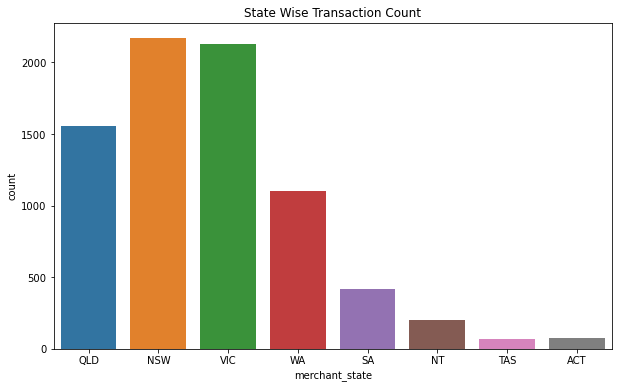

In [37]:
plt.figure(figsize=(10, 6))
sb.countplot(data.merchant_state).set(title ='State Wise Transaction Count')
plt.show()

In [38]:
# types of transactions
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


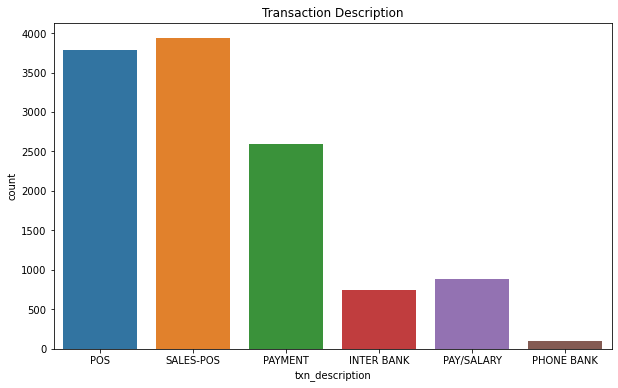

In [39]:
plt.figure(figsize=(10, 6))
sb.countplot(data.txn_description).set(title = 'Transaction Description')
plt.show()

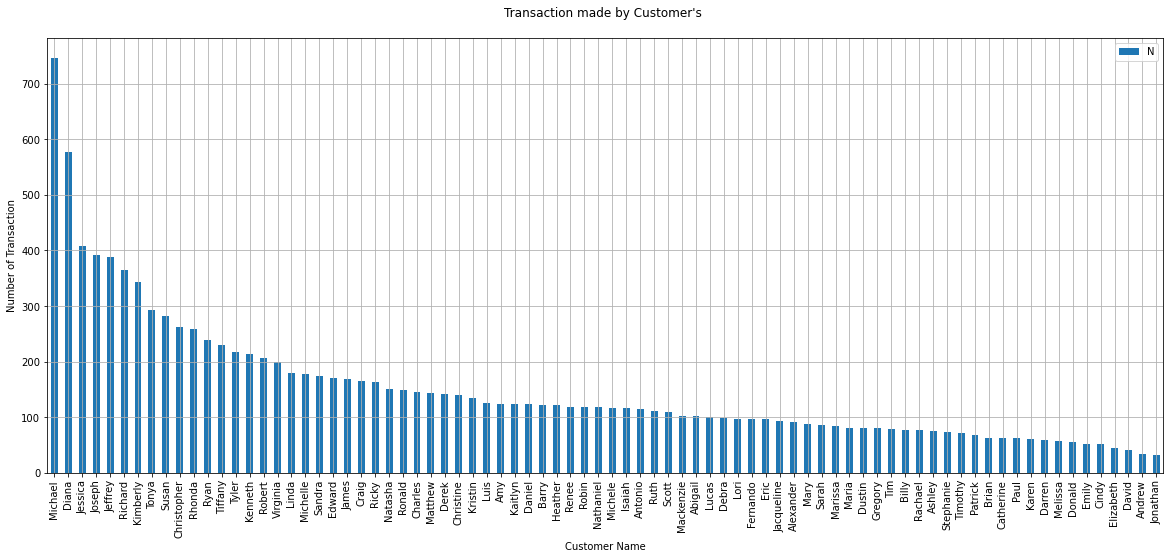

In [40]:
# Number of transaction made by customers
plt.figure(figsize=(20,8))
data['first_name'].value_counts().plot.bar()
plt.title("Transaction made by Customer's \n")
plt.xlabel("Customer Name")
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel("Number of Transaction")
plt.legend('Name of Customer')
plt.show()

In [41]:
top_10_customers = data.first_name.value_counts(sort = True).head(10)
top_10_customers

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Name: first_name, dtype: int64

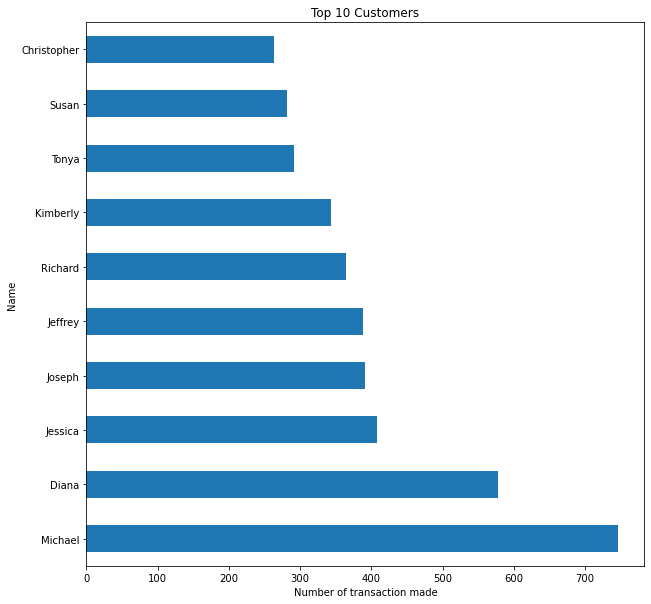

In [42]:
fig,ax = plt.subplots(figsize=(10,10)) 
top_10_customers.plot.barh()
ax.set(title="Top 10 Customers", xlabel="Number of transaction made", ylabel="Name")
plt.show()

**Time Series Analysis**

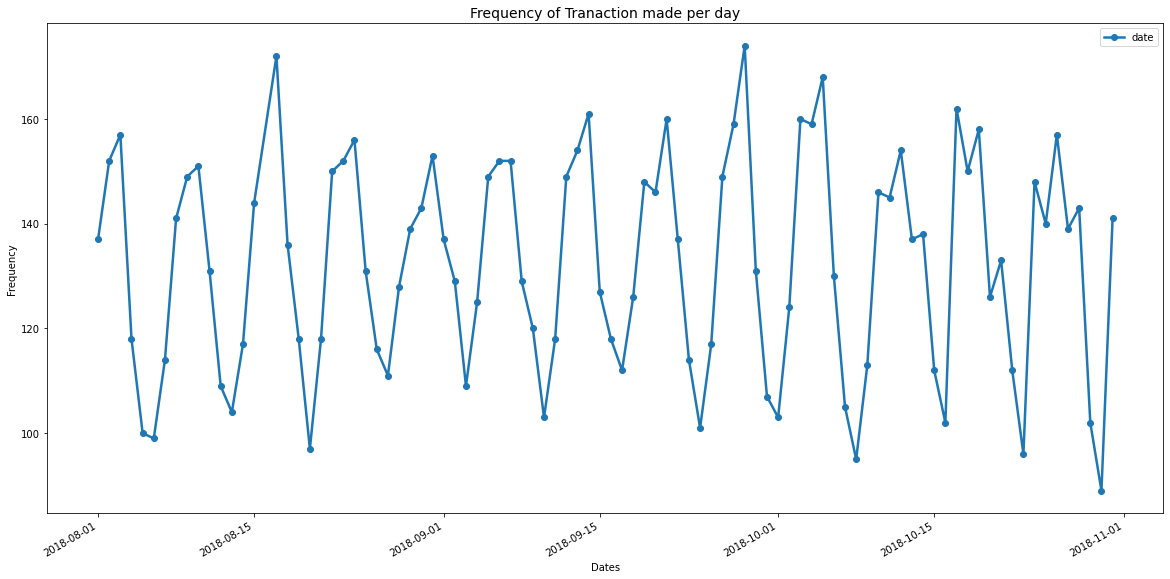

In [43]:
data.date.value_counts(sort = True).plot(kind = 'line', linewidth = 2.5, linestyle = '-', marker = 'o', figsize = (20, 10))
plt.xlabel("Dates")
plt.ylabel("Frequency")
plt.title('Frequency of Tranaction made per day', fontdict={'fontsize':14})
plt.legend()
plt.show()

**Transaction Volume Each Day**

the avarage transaction processed each day in the duration of 3 month period.

In [44]:
data_date_count = data.groupby("date").count()
trans_vol = data_date_count["customer_id"].mean()
print("Average Transaction Volume :",trans_vol)
nPoints1 = len(data_date_count.index)

Average Transaction Volume : 132.34065934065933


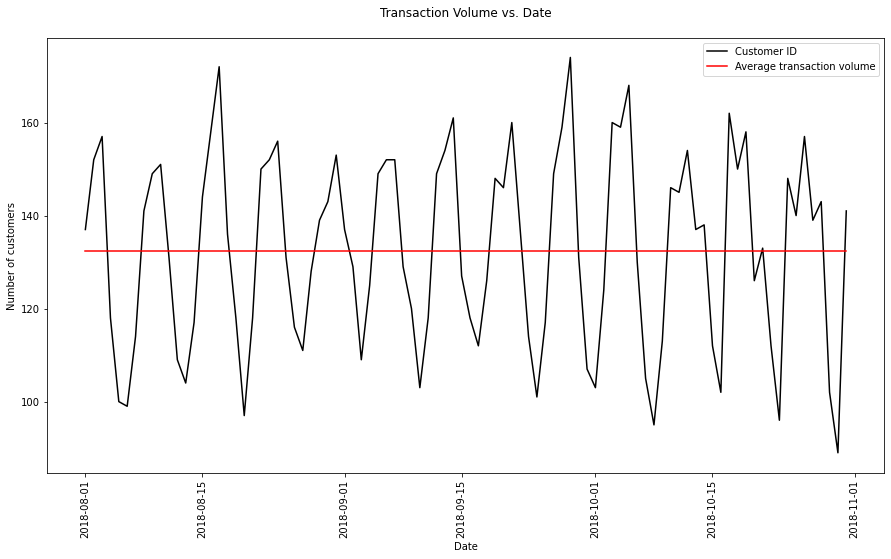

In [45]:
plt.figure(figsize=(15,8))
plt.plot(data_date_count.index, data_date_count["customer_id"], c="black", label = "Customer ID")
plt.plot(data_date_count.index, np.linspace(trans_vol,trans_vol,nPoints1), c="r", label = "Average transaction volume")
plt.title("Transaction Volume vs. Date\n")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Number of customers")
plt.legend()
plt.show()

**Average Transaction amount each day**

In [46]:
data_date_mean = data.groupby("date").mean()
trans_amt = data_date_mean["amount"].mean()
print("Average Transaction Amount is:",trans_amt)
nPoints2 = len(data_date_count.index)

Average Transaction Amount is: 190.61056774083966


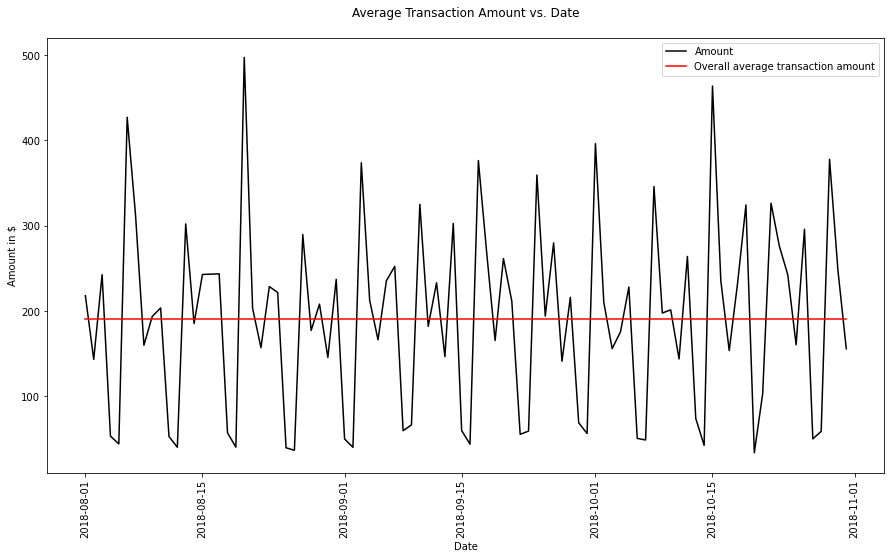

In [47]:
plt.figure(figsize=(15,8))
plt.plot(data_date_count.index, data_date_mean["amount"], c="black", label = "Amount")
plt.plot(data_date_count.index, np.linspace(trans_amt,trans_amt,nPoints2), c="r", label = "Overall average transaction amount")
plt.title("Average Transaction Amount vs. Date\n")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Amount in $")
plt.legend()
plt.show()

**Average Customer balance and amount by age**

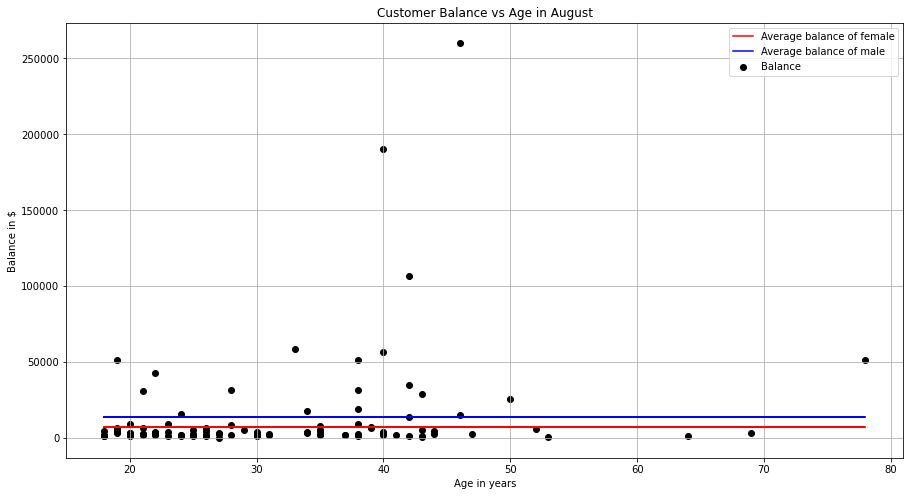

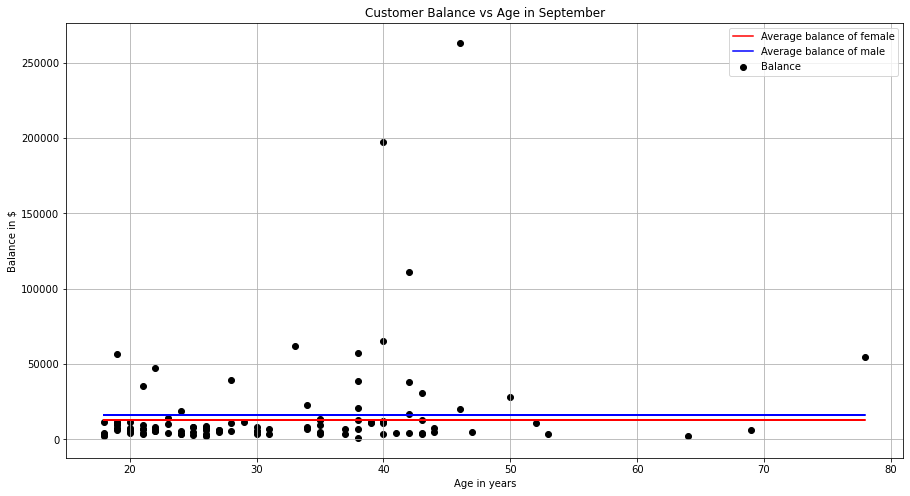

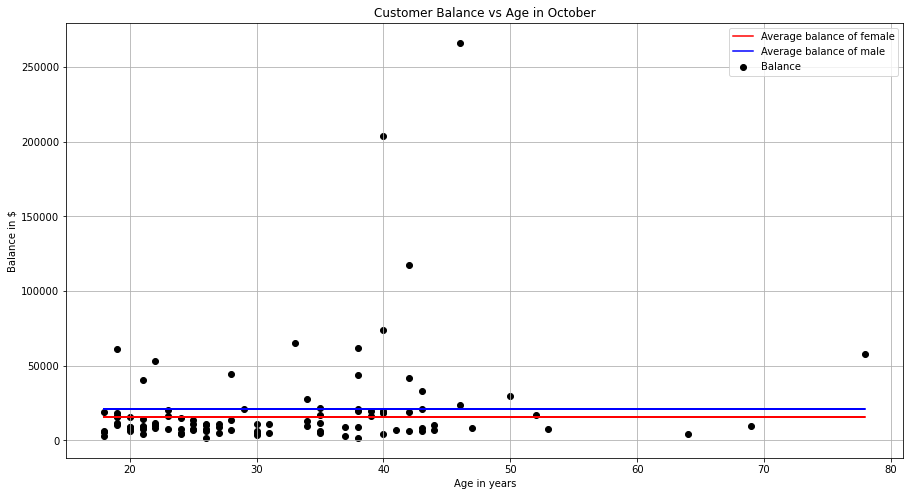

In [48]:
# Customer Balance
month=['August','September','October']

for m in month:
    data_cust = data[data["month_name"] == m].groupby("customer_id").mean()
    data_gen = data[data["month_name"] == m].groupby("gender").mean()

    mean_female_bal = data_gen["balance"].iloc[0]
    mean_male_bal = data_gen["balance"].iloc[1]
    nPoints=len(data_cust["age"])

    plt.figure(figsize=(15,8))
    plt.scatter(data_cust["age"], data_cust["balance"], c="black", label="Balance")
    plt.plot(data_cust["age"], np.linspace(mean_female_bal,mean_female_bal,nPoints), c="r", label = "Average balance of female")
    plt.plot(data_cust["age"], np.linspace(mean_male_bal,mean_male_bal,nPoints), c="b", label = "Average balance of male")
    plt.title("Customer Balance vs Age in {}".format(m))
    plt.xlabel("Age in years")
    plt.grid(True)
    plt.ylabel("Balance in $")
    plt.legend()
    plt.show()

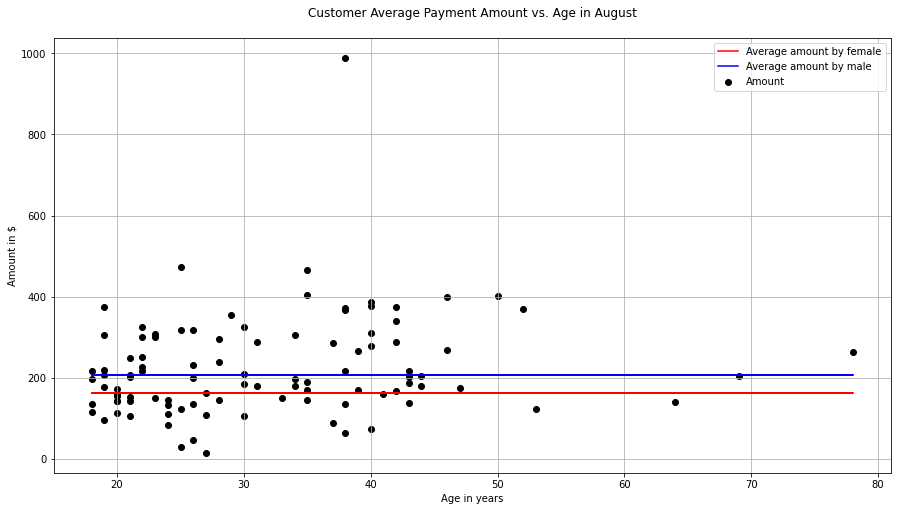

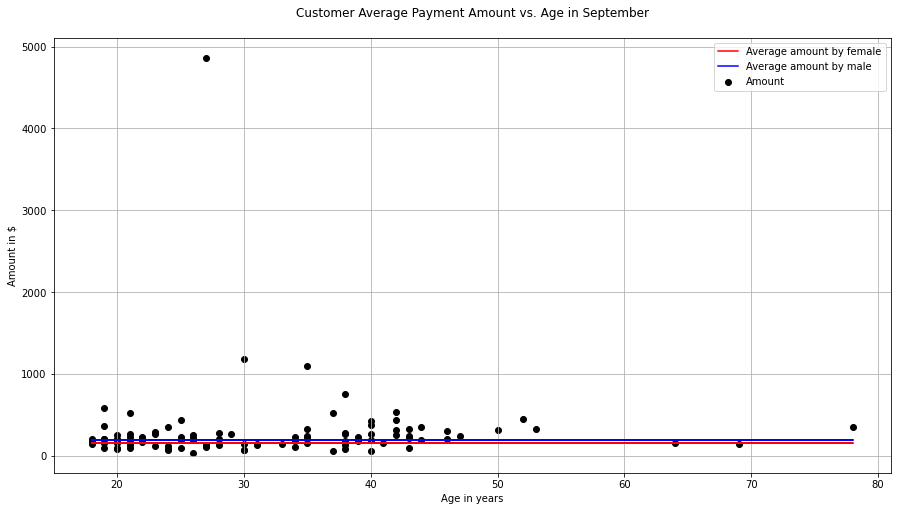

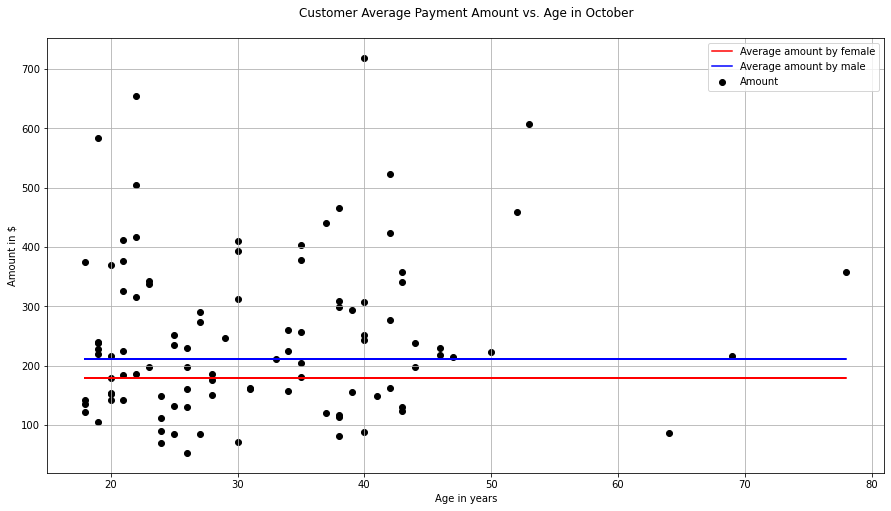

In [49]:
# Customer Average Payment Amount

for m in month:
    data_cust = data[data["month_name"] == m].groupby("customer_id").mean()
    data_gen = data[data["month_name"] == m].groupby("gender").mean()

    mean_female_amt = data_gen["amount"].iloc[0]
    mean_male_amt = data_gen["amount"].iloc[1]
    nPoints=len(data_cust["age"])

    plt.figure(figsize=(15,8))
    plt.scatter(data_cust["age"], data_cust["amount"], c="black", label="Amount")
    plt.plot(data_cust["age"], np.linspace(mean_female_amt,mean_female_amt,nPoints), c="r", label = "Average amount by female")
    plt.plot(data_cust["age"], np.linspace(mean_male_amt,mean_male_amt,nPoints), c="b", label = "Average amount by male")
    plt.title("Customer Average Payment Amount vs. Age in {}\n".format(m))
    plt.xlabel("Age in years")
    plt.ylabel("Amount in $")  
    plt.grid(True)
    plt.legend()

# Pickling

In [50]:
import os
import pickle

# Making directory processed_data
if not os.path.exists(os.path.join("..", "cleaned_data")):
    os.makedirs(os.path.join("..", "cleaned_data"))

# saving the data as a picke file in 'processed_data.pkl'  
PICKLE_DATA_DIR = os.path.join("..", "cleaned_data", "procesed_data.pkl")

pd.to_pickle(data, PICKLE_DATA_DIR)